In [3]:
import numpy as np
from scipy.io import loadmat
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from scipy.misc import imshow
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#  PROBLEM 1

## MNIST Dataset

In [4]:
mnist = loadmat('mnist-original.mat')
mnist_X = np.transpose(mnist['data'])
mnist_y = np.transpose(mnist['label'])
mnist_train_X, mnist_test_X, mnist_train_y, mnist_test_y = train_test_split(mnist_X, mnist_y, stratify=mnist_y)

Logistic Regression works better than Decision Tree on MNIST dataset since there is 91% accuracy using LR and 86% accuracy using DT. Trying different regularization parameters do not have much impact on the LR performance. However, using polynomial basis expansion functions might improve the performance.

### Logistic Regression

In [6]:
%%time
clf = LogisticRegression(penalty='l2', n_jobs=-1, solver='sag')
clf.fit(mnist_train_X, mnist_train_y.ravel())

/Users/ZweNaing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


CPU times: user 10min 43s, sys: 1min 55s, total: 12min 39s
Wall time: 6min 32s


In [7]:
print("Train accuracy score: ", clf.score(mnist_train_X, mnist_train_y))
print("Test accuracy score: ", clf.score(mnist_test_X, mnist_test_y))

Train accuracy score:  0.9280952380952381
Test accuracy score:  0.9128


In [8]:
print("Top 30 Features: \n")
print(np.argsort(clf.coef_)[:, -30:])

Top 30 Features: 

[[341 176 544 339 397 213 271 327 262 298 514 153 681 331 428 127 360 357
  386 459 275 265 430 207  44 370 240 189 302 629]
 [ 72 594 591 576 541 343 548 340 490 656 162 351 406 379 145 381 521 634
  613 163 552 489 528 323 636 294 612 350  69 621]
 [567 666 613 622 564 423 558 697 693 473 362  93 454 669 585 451 391 509
  502 313 696 390 389 361 611 418 501 425 446 474]
 [450 580 520 189 495 708 274 499 443 466 413 147 134 256  89 330 526 303
  395  92 535 312  96 117 678 145 480 104 676 507]
 [231 691 463 499 490 426 468 254 635 373 379 637 516 694 424 375 638 229
  596 136 399 417 219 593 191 678 396 513 442 348]
 [371 724 608 192 592 482 681 314 649 273 277 302 276 609 424 248 306 221
  723 416 331 582 722 305 444 304 334 362 332 333]
 [636 201 398 161  66 601 583 542 610  92  76 544 379  64 440 574 414 522
  303 662 107 637 484 313  91  78 370  77  79 387]
 [296 496 385 231 366 344 692 174 494 264 750 284 293 777 568 415 651 441
  266 778 282 171 199 704 311 30

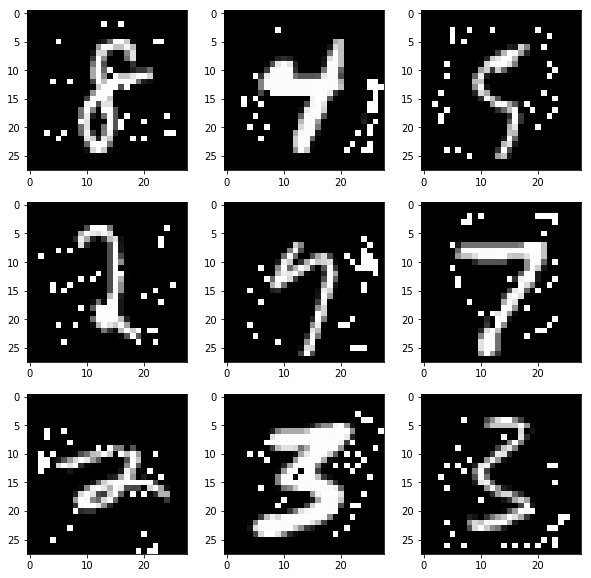

In [11]:
indices = np.argsort(clf.coef_)[:, -30:]
plt.figure(figsize=((10, 10)))
for i in range(1, 10):
    img = mnist_train_X[i, :]
    
    # blk_img = np.zeros((784))
    # blk_img[:] = 255
    features = indices[i, :]
    img[features] = 255
    ax = plt.subplot(3, 3, i)
    ax.imshow(img.reshape(28, 28), cmap='gray')

### Decision Tree


In [84]:
%%time
mnist_tree = DecisionTreeClassifier()
mnist_tree.fit(mnist_train_X, mnist_train_y)

CPU times: user 21.8 s, sys: 108 ms, total: 21.9 s
Wall time: 21.9 s


In [85]:
print("Train accuracy score: ", mnist_tree.score(mnist_train_X, mnist_train_y))

Train accuracy score:  1.0


In [86]:
print("Test accuracy score: ", mnist_tree.score(mnist_test_X, mnist_test_y))

Test accuracy score:  0.866971428571


In [87]:
print('Top 30 Features: \n')
indices = np.argsort(mnist_tree.feature_importances_)
print(indices[- 30:])

Top 30 Features: 

[ 95 345 516 348 296 267 297 551 155 101 271 381 655 486 154 354 347 290
 156 485  98 405 234 346 211 430 568 350 435 489]


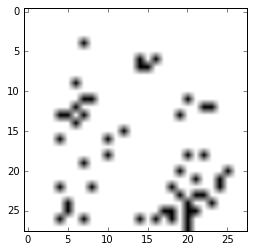

In [88]:
indices = np.argsort(clf.coef_)[:, -50:]
blk_img = np.zeros((784))
blk_img[:] = 255
features = indices[i, :]
blk_img[features] = 0
plt.imshow(blk_img.reshape(28, 28), cmap='gray')

## 20 NEWS GROUP Dataset

In [40]:
# fetch train and test datasets
train_data = fetch_20newsgroups(subset='train')
news_group_train_y = train_data['target']
test_data = fetch_20newsgroups(subset='test')
news_group_test_y = test_data['target']
# convert into unigram matrix
vectorizer = TfidfVectorizer()
news_group_train_X = vectorizer.fit_transform(train_data['data'])
news_group_test_X = vectorizer.transform(test_data['data'])
# convert into a sparse matrix
news_group_train_X = csr_matrix(news_group_train_X)
news_group_test_X = csr_matrix(news_group_test_X)

Logistic Regression work better on the 20 News Group dataset than Decision Trees. The overfitting is the main problem in Decision Tree since I discovered that the accuracy on training set is very high while the performance on test set is very low, 99% and 55% respectively. Different parameters of Decision Trees (number of leaf nodes, depth of the tree, number of splits) do not have much impact on the performance.

## Logistic Regression

In [41]:
%%time
nn_clf = LogisticRegression(penalty='l2', n_jobs=-1, solver='sag')
nn_clf.fit(news_group_train_X, news_group_train_y.ravel())

CPU times: user 7.6 s, sys: 64 ms, total: 7.67 s
Wall time: 1.22 s


In [42]:
print("Train Accuracy score: ", nn_clf.score(news_group_train_X, news_group_train_y))

Train Accuracy score:  0.969948736079


In [43]:
print("Test Accuracy score: ", nn_clf.score(news_group_test_X, news_group_test_y))

Test Accuracy score:  0.827801380775


In [44]:
vocabulary = {}
for k, v in vectorizer.vocabulary_.items():
    vocabulary[v] = k

In [45]:
nn_indices = np.argsort(nn_clf.coef_)[:, -30:]
n, d = nn_indices.shape
for i in range(n):
    str = ""
    print(train_data.target_names[i])
    for j in range(d):
        str += vocabulary[nn_indices[i][j]] + " "
    print(str)
    print("\n")

alt.atheism
wpd bible gregg ico solntze cobb mantis tek wingate kmr4 osrhe sgi umd religion mangoe benedikt edu is rushdie jaeger livesey god mathew okcforum islam islamic caltech atheists atheism keith 


comp.graphics
looking 24 software code quicktime library 42 surface file algorithm vesa program color gif sphere vga package animation pov 3do format points files cview images tiff polygon 3d image graphics 


comp.os.ms-windows.misc
deskjet problem manager diamond bmp use card program using ftp access microsoft printer fonts font win3 ms ini risc nt win mouse dos cica files drivers driver ax file windows 


comp.sys.ibm.pc.hardware
system boot memory cpu thanks drives board ibm dos help eisa monitors irq floppy isa disk motherboard bios vlb port 486 monitor controller gateway ide bus pc card scsi drive 


comp.sys.mac.hardware
fpu ram problem speed macs internal macintosh clock upgrade 610 vram nubus simm drive adb c650 bmug modem iisi simms monitor lciii lc se powerbook centris duo

### Decision Tree

In [46]:
%%time
nn_tree = DecisionTreeClassifier()
nn_tree.fit(news_group_train_X, news_group_train_y)

CPU times: user 25.8 s, sys: 3 µs, total: 25.8 s
Wall time: 25.8 s


In [47]:
print("Train Accuracy score: ", nn_tree.score(news_group_train_X, news_group_train_y))

Train Accuracy score:  0.99991161393


In [48]:
print("Test Accuracy score: ", nn_tree.score(news_group_test_X, news_group_test_y))

Test Accuracy score:  0.554036112586


In [49]:
print('Top 30 Features: \n')
indices = np.argsort(nn_tree.feature_importances_)[-30:]
str = ""
for i in range(30):
    str += vocabulary[indices[i]] + " " 
print(str)

Top 30 Features: 

disease orbit waco team article controller motif encryption the re atheists rutgers geb window nhl graphics mac bike turkish baseball gun space israel car god hockey windows dod sale clipper 


In [53]:
max_leaf_nodes = [10, 100, 1000, 10000]
for l in max_leaf_nodes:
    sample_tree = DecisionTreeClassifier(max_leaf_nodes=l)
    sample_tree.fit(news_group_train_X, news_group_train_y)
    print("Max Number of Leafs: ", l,
        "Train Accuracy score: ", sample_tree.score(news_group_train_X, news_group_train_y), 
          " Test Accuracy score: ", sample_tree.score(news_group_test_X, news_group_test_y))

Train Accuracy score:  0.293176595369  Test Accuracy score:  0.278146574615
Train Accuracy score:  0.61932119498  Test Accuracy score:  0.533191715348
Train Accuracy score:  0.882004596076  Test Accuracy score:  0.558682952735
Train Accuracy score:  0.99991161393  Test Accuracy score:  0.553372278279


In [57]:
max_leaf_nodes = [1000, 1200, 1400, 1600, 1800, 2000]
for l in max_leaf_nodes:
    sample_tree = DecisionTreeClassifier(max_leaf_nodes=l)
    sample_tree.fit(news_group_train_X, news_group_train_y)
    print("Max Number of Leafs: ", l,
        "Train Accuracy score: ", sample_tree.score(news_group_train_X, news_group_train_y), 
          " Test Accuracy score: ", sample_tree.score(news_group_test_X, news_group_test_y))

Max Number of Leafs:  1000 Train Accuracy score:  0.883683931412  Test Accuracy score:  0.556027615507
Max Number of Leafs:  1200 Train Accuracy score:  0.910730068941  Test Accuracy score:  0.5553637812
Max Number of Leafs:  1400 Train Accuracy score:  0.931854339756  Test Accuracy score:  0.552708443972
Max Number of Leafs:  1600 Train Accuracy score:  0.949973484179  Test Accuracy score:  0.553505045141
Max Number of Leafs:  1800 Train Accuracy score:  0.968799717165  Test Accuracy score:  0.552973977695
Max Number of Leafs:  2000 Train Accuracy score:  0.985416298391  Test Accuracy score:  0.5553637812


In [58]:
max_depth = [10, 100, 1000, 10000]
for d in max_depth:
    sample_tree = DecisionTreeClassifier(max_depth=d)
    sample_tree.fit(news_group_train_X, news_group_train_y)
    print("Maximum Depth: ", d,
        "Train Accuracy score: ", sample_tree.score(news_group_train_X, news_group_train_y), 
          "Test Accuracy score: ", sample_tree.score(news_group_test_X, news_group_test_y))

Maximum Depth:  10 Train Accuracy score:  0.344086971893 Test Accuracy score:  0.29965480616
Maximum Depth:  100 Train Accuracy score:  0.892345766307 Test Accuracy score:  0.537307488051
Maximum Depth:  1000 Train Accuracy score:  0.99991161393 Test Accuracy score:  0.555098247477
Maximum Depth:  10000 Train Accuracy score:  0.99991161393 Test Accuracy score:  0.556027615507


In [60]:
max_depth = [200, 400, 600, 800]
for d in max_depth:
    sample_tree = DecisionTreeClassifier(max_depth=d)
    sample_tree.fit(news_group_train_X, news_group_train_y)
    print("Maximum Depth: ", d,
        "Train Accuracy score: ", sample_tree.score(news_group_train_X, news_group_train_y), 
          "Test Accuracy score: ", sample_tree.score(news_group_test_X, news_group_test_y))

Maximum Depth:  200 Train Accuracy score:  0.984885981969 Test Accuracy score:  0.557753584705
Maximum Depth:  400 Train Accuracy score:  0.99991161393 Test Accuracy score:  0.554301646309
Maximum Depth:  600 Train Accuracy score:  0.99991161393 Test Accuracy score:  0.556691449814
Maximum Depth:  800 Train Accuracy score:  0.99991161393 Test Accuracy score:  0.554965480616


In [59]:
min_samples_split = [10, 100, 1000, 10000]
for s in min_samples_split:
    sample_tree = DecisionTreeClassifier(min_samples_split=s)
    sample_tree.fit(news_group_train_X, news_group_train_y)
    print("Maximum samples to split: ", s,
        "Train Accuracy score: ", sample_tree.score(news_group_train_X, news_group_train_y), 
          "Test Accuracy score: ", sample_tree.score(news_group_test_X, news_group_test_y))

Maximum samples to split:  10 Train Accuracy score:  0.909139119675 Test Accuracy score:  0.553770578864
Maximum samples to split:  100 Train Accuracy score:  0.800601025278 Test Accuracy score:  0.572889006904
Maximum samples to split:  1000 Train Accuracy score:  0.606681986919 Test Accuracy score:  0.518321826872
Maximum samples to split:  10000 Train Accuracy score:  0.173678628248 Test Accuracy score:  0.170339883165


In [61]:
min_samples_split = [20, 40, 60, 80]
for s in min_samples_split:
    sample_tree = DecisionTreeClassifier(min_samples_split=s)
    sample_tree.fit(news_group_train_X, news_group_train_y)
    print("Maximum samples to split: ", s,
        "Train Accuracy score: ", sample_tree.score(news_group_train_X, news_group_train_y), 
          "Test Accuracy score: ", sample_tree.score(news_group_test_X, news_group_test_y))

Maximum samples to split:  20 Train Accuracy score:  0.871751811914 Test Accuracy score:  0.560807222517
Maximum samples to split:  40 Train Accuracy score:  0.834187732013 Test Accuracy score:  0.568374933617
Maximum samples to split:  60 Train Accuracy score:  0.821548523953 Test Accuracy score:  0.575146043548
Maximum samples to split:  80 Train Accuracy score:  0.808290613399 Test Accuracy score:  0.575544344132


## Spambase Dataset

In [2]:
data = pd.read_csv('spambase/spambase.data', dtype='float', names=[i for i in range(56)])
data = data.values

In [3]:
spam_data_X = data[:, :54]
spam_data_y = data[:, 55]
spam_train_X, spam_test_X, spam_train_y, spam_test_y = train_test_split(spam_data_X, spam_data_y)

Logistic Regression still works better than Decision Tree on the spambase dataset. LR achieves 92% accuracy rate while DT achieves 90% accuracy.

### Logistic Regression

In [4]:
%%time
spam_clf = LogisticRegression(penalty='l2', n_jobs=-1, solver='liblinear')
spam_clf.fit(spam_train_X, spam_train_y.ravel())

CPU times: user 121 ms, sys: 3.8 ms, total: 124 ms
Wall time: 123 ms


In [6]:
print("Train Accuracy score: ", spam_clf.score(spam_train_X, spam_train_y))

Train Accuracy score:  0.931884057971


In [7]:
print("Test Accuracy score: ", spam_clf.score(spam_test_X, spam_test_y))

Test Accuracy score:  0.927888792354


In [23]:
print("Top 30 Features: \n")
print(np.argsort(spam_clf.coef_)[:, -30:])

Top 30 Features: 

[[52 53 31 29 11  0 16 10  7 34 25 19 15 18 49 21  5  2  6 33 14  3  1 12
  17 51 13  4 20 50]]


In [100]:
c = StringIO("word_freq_make, word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total")
txt = np.loadtxt(c, dtype=str, delimiter=',')

In [102]:
indices = np.argsort(spam_clf.coef_)[:, -30:]
txt[indices]

array([["b'char_freq_$'", "b'word_freq_receive'", "b'char_freq_'",
        "b'word_freq_85'", "b'word_freq_free'", "b'word_freq_labs'",
        "b'word_freq_business'", "b'word_freq_technology'",
        "b'word_freq_internet'", "b'word_freq_make'", "b'word_freq_you'",
        "b'word_freq_will'", "b'word_freq_credit'", "b'word_freq_hpl'",
        "b'word_freq_font'", "b'word_freq_all'", "b'char_freq_('",
        "b'word_freq_over'", "b'word_freq_3d'", "b'word_freq_people'",
        "b'word_freq_415'", "b' word_freq_address'", "b'word_freq_report'",
        "b'word_freq_addresses'", "b'word_freq_remove'",
        "b'word_freq_email'", "b'char_freq_!'", "b'word_freq_your'",
        "b'word_freq_our'", "b'char_freq_['"]], 
      dtype='<U23')

### Decision Tree

In [103]:
%%time
spam_tree = DecisionTreeClassifier()
spam_tree.fit(spam_train_X, spam_train_y)

CPU times: user 46.4 ms, sys: 4 ms, total: 50.4 ms
Wall time: 49.3 ms


In [104]:
print("Train Accuracy score: ", spam_clf.score(spam_train_X, spam_train_y))

Train Accuracy score:  0.931884057971


In [105]:
print("Test Accuracy score: ", spam_tree.score(spam_test_X, spam_test_y))

Test Accuracy score:  0.90877497828


In [106]:
print('Top 30 Features: \n')
print(np.argsort(spam_tree.feature_importances_)[-30:])

Top 30 Features: 

[20 19 47 17 40  7 46  8  3 34 33 21 42  9 15 14  5 39 18 16 53 24 43  2 50
 22 13  4 52 49]


In [107]:
indices = np.argsort(spam_tree.feature_importances_)[-30:]
txt[indices]

array(["b'word_freq_your'", "b'word_freq_credit'",
       "b'word_freq_conference'", "b'word_freq_email'", "b'word_freq_cs'",
       "b'word_freq_internet'", "b'word_freq_table'", "b'word_freq_order'",
       "b'word_freq_3d'", "b'word_freq_85'", "b'word_freq_415'",
       "b'word_freq_font'", "b'word_freq_original'", "b'word_freq_mail'",
       "b'word_freq_free'", "b'word_freq_addresses'", "b'word_freq_over'",
       "b'word_freq_direct'", "b'word_freq_you'", "b'word_freq_business'",
       "b'char_freq_'", "b'word_freq_hp'", "b'word_freq_project'",
       "b'word_freq_all'", "b'char_freq_['", "b'word_freq_000'",
       "b'word_freq_report'", "b'word_freq_our'", "b'char_freq_$'",
       "b'char_freq_('"], 
      dtype='<U23')